Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [118]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy import interpolate
import matplotlib.pyplot as plt
oxi = np.load('C:/Users/au646069/Desktop/dash/Subject_1111391.npy', allow_pickle=True)[0]

# Peak detection

Parameters
----------
x : list or Numpy array
    The oxi signal.
sfreq = int
    The sampling frequency. Default is set to 75 Hz.
win : int
    Window size (in seconds) used to compute the threshold.
new_sfreq : int
    If `resample=True`, the new sampling frequency.
resample : boolean
    If `True`, will resample the signal at `new_sfreq`.

In [119]:
x = oxi
sfreq=75
win=1
new_sfreq=750
resample=False

To array

In [120]:
if isinstance(x, list):
    x = np.asarray(x)

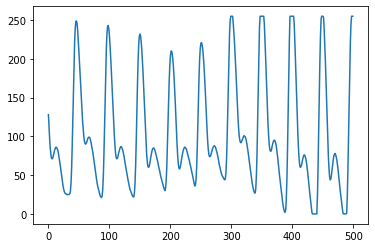

In [121]:
plt.plot(x[:500])

Upsample to 750 Hz (default)

In [122]:
# Interpolate
if resample is True:
    f = interpolate.interp1d(np.arange(0, len(x)/sfreq, 1/sfreq),
                             x,
                             fill_value="extrapolate")
    time = np.arange(0, len(x)/sfreq, 1/new_sfreq)
    x = f(time)
else:
    new_sfreq = sfreq

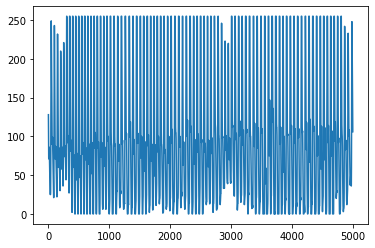

In [123]:
plt.plot(x[:5000])

# Moving average (high frequency noise + clipping)

In [124]:
rollingNoise = int(sfreq)  # Windoz with sizw 0.1 second
x = pd.DataFrame({'signal': x}).rolling(rollingNoise, center=True).mean().signal.values

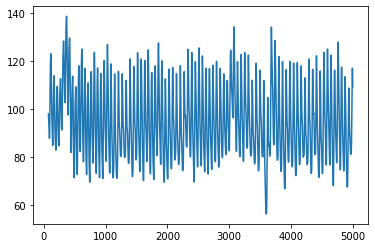

In [125]:
plt.plot(x[:5000])

## Square signal

In [126]:
x = x ** 2

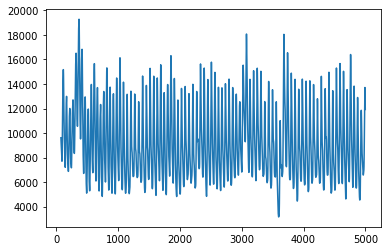

In [127]:
plt.plot(x[:5000])

## Compute moving average + standard deviation

In [128]:
signal = pd.DataFrame({'signal': x})

mean_signal = signal.rolling(int(new_sfreq*0.75), center=True).mean().signal.values
std_signal = signal.rolling(int(new_sfreq*0.75), center=True).std().signal.values

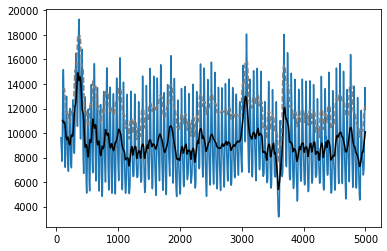

In [129]:
plt.plot(x[:5000])
plt.plot(mean_signal[:5000], 'k')
plt.plot(mean_signal[:5000] + std_signal[:5000], color='gray', linestyle='--')

## Substract moving mean + standard deviation

In [130]:
x -= (mean_signal + std_signal)

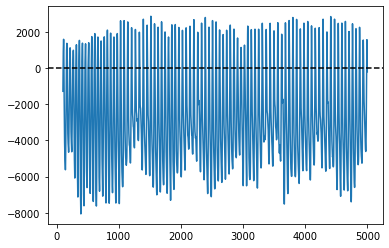

In [131]:
plt.plot(x[:5000])
plt.axhline(y=0, linestyle='--', color='k')

## Find positive peaks

In [132]:
peaks_idx = find_peaks(x, height=0)[0]

(0, 5000)

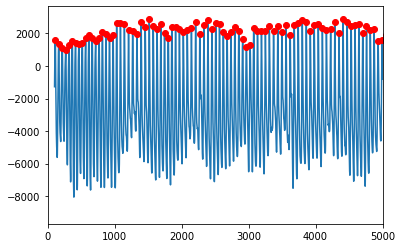

In [133]:
plt.plot(x)
plt.plot(peaks_idx, x[peaks_idx], 'ro')
plt.xlim(0, 5000)

## Create boolean vector as Output

In [134]:
peaks = np.zeros(len(x))
peaks[peaks_idx] = 1

if len(peaks) != len(x):
    raise ValueError('Inconsistent output lenght')

## Detection errors

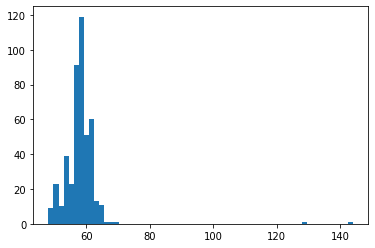

In [135]:
plt.hist(np.diff(np.where(peaks)[0]), bins=60);